In [103]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bits-f464-2023-1-final-project/sample_submission.csv
/kaggle/input/bits-f464-2023-1-final-project/train.csv
/kaggle/input/bits-f464-2023-1-final-project/test.csv


In [104]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [105]:
df = pd.read_csv("/kaggle/input/bits-f464-2023-1-final-project/train.csv")

df.shape

(400000, 31)

In [106]:
df.head(3)

,Feat-1,Feat-2,Feat-3,Feat-4,Feat-5,Feat-6,Feat-7,Feat-8,Feat-9,Feat-10,Feat-11,Feat-12,Feat-13,Feat-14,Feat-15,Feat-16,Feat-17,Feat-18,Feat-19,Feat-20,Feat-21,Feat-22,Feat-23,Feat-24,Feat-25,Feat-26,Feat-27,Feat-28,Feat-29,Feat-30,Target
0,0.412963,0.577200,-0.953418,0.798840,0.658006,0.768405,-0.405588,-0.442541,-0.001558,1.049287,-0.815715,0.012169,1.686507,2.211378,0.786737,0.000501,0.970637,2.567250,0.809052,-1.031543,-0.099158,0.009059,0.646514,0.860895,-2.411875,0.994851,1.025006,0.579802,0.803897,0.904436,0.0
1,0.591946,1.210280,1.718345,3.053790,-1.179496,1.109550,0.775757,0.153515,-0.001558,0.555115,-0.303470,0.836865,1.289804,2.211378,0.824846,1.343117,-0.096776,2.567250,0.454408,-1.128983,0.560736,0.009059,1.478546,1.046527,0.503741,1.002365,0.842098,0.713030,0.777919,1.009964,0.0
2,1.907598,0.455454,-1.252488,0.215091,0.001179,0.489095,2.519551,0.292663,-0.001558,0.460814,0.573862,1.755785,1.187715,-0.003494,0.479751,0.405561,-0.461792,0.019025,1.025441,0.492523,1.317636,3.111020,0.886526,0.740503,1.110159,0.998776,0.704871,0.493281,0.594564,0.580279,0.0


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 31 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Feat-1   400000 non-null  float64
 1   Feat-2   400000 non-null  float64
 2   Feat-3   400000 non-null  float64
 3   Feat-4   400000 non-null  float64
 4   Feat-5   400000 non-null  float64
 5   Feat-6   400000 non-null  float64
 6   Feat-7   400000 non-null  float64
 7   Feat-8   400000 non-null  float64
 8   Feat-9   400000 non-null  float64
 9   Feat-10  400000 non-null  float64
 10  Feat-11  400000 non-null  float64
 11  Feat-12  400000 non-null  float64
 12  Feat-13  400000 non-null  float64
 13  Feat-14  400000 non-null  float64
 14  Feat-15  400000 non-null  float64
 15  Feat-16  400000 non-null  float64
 16  Feat-17  400000 non-null  float64
 17  Feat-18  400000 non-null  float64
 18  Feat-19  400000 non-null  float64
 19  Feat-20  400000 non-null  float64
 20  Feat-21  400000 non-null  

In [108]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Feat-1,400000.0,0.982843,0.565193,0.265458,0.581698,0.845048,1.229367,8.702543
Feat-2,400000.0,-0.001561,1.008540,-2.437234,-0.738632,-0.002312,0.737905,2.432610
Feat-3,400000.0,-0.001017,1.005795,-1.741876,-0.872408,-0.000164,0.869407,1.743868
Feat-4,400000.0,0.984703,0.599097,-0.012135,0.564164,0.877646,1.278462,9.888168
Feat-5,400000.0,0.009894,1.007104,-1.732265,-0.861432,0.008527,0.884040,1.754930
Feat-6,400000.0,0.990885,0.475918,0.139338,0.679180,0.894823,1.170194,8.383347
Feat-7,400000.0,0.007212,1.010436,-2.961371,-0.678891,0.007338,0.693567,2.978028
Feat-8,400000.0,-0.003996,1.006052,-1.745881,-0.871076,-0.005139,0.864224,1.736811
Feat-9,400000.0,0.999195,1.028296,-0.001558,-0.001558,1.084980,2.171518,2.171518
Feat-10,400000.0,0.996191,0.501944,0.191758,0.659741,0.893040,1.203896,11.649858


In [109]:
## Checking for missing values

df.isnull().sum()

Feat-1     0
Feat-2     0
Feat-3     0
Feat-4     0
Feat-5     0
Feat-6     0
Feat-7     0
Feat-8     0
Feat-9     0
Feat-10    0
Feat-11    0
Feat-12    0
Feat-13    0
Feat-14    0
Feat-15    0
Feat-16    0
Feat-17    0
Feat-18    0
Feat-19    0
Feat-20    0
Feat-21    0
Feat-22    0
Feat-23    0
Feat-24    0
Feat-25    0
Feat-26    0
Feat-27    0
Feat-28    0
Feat-29    0
Feat-30    0
Target     0
dtype: int64

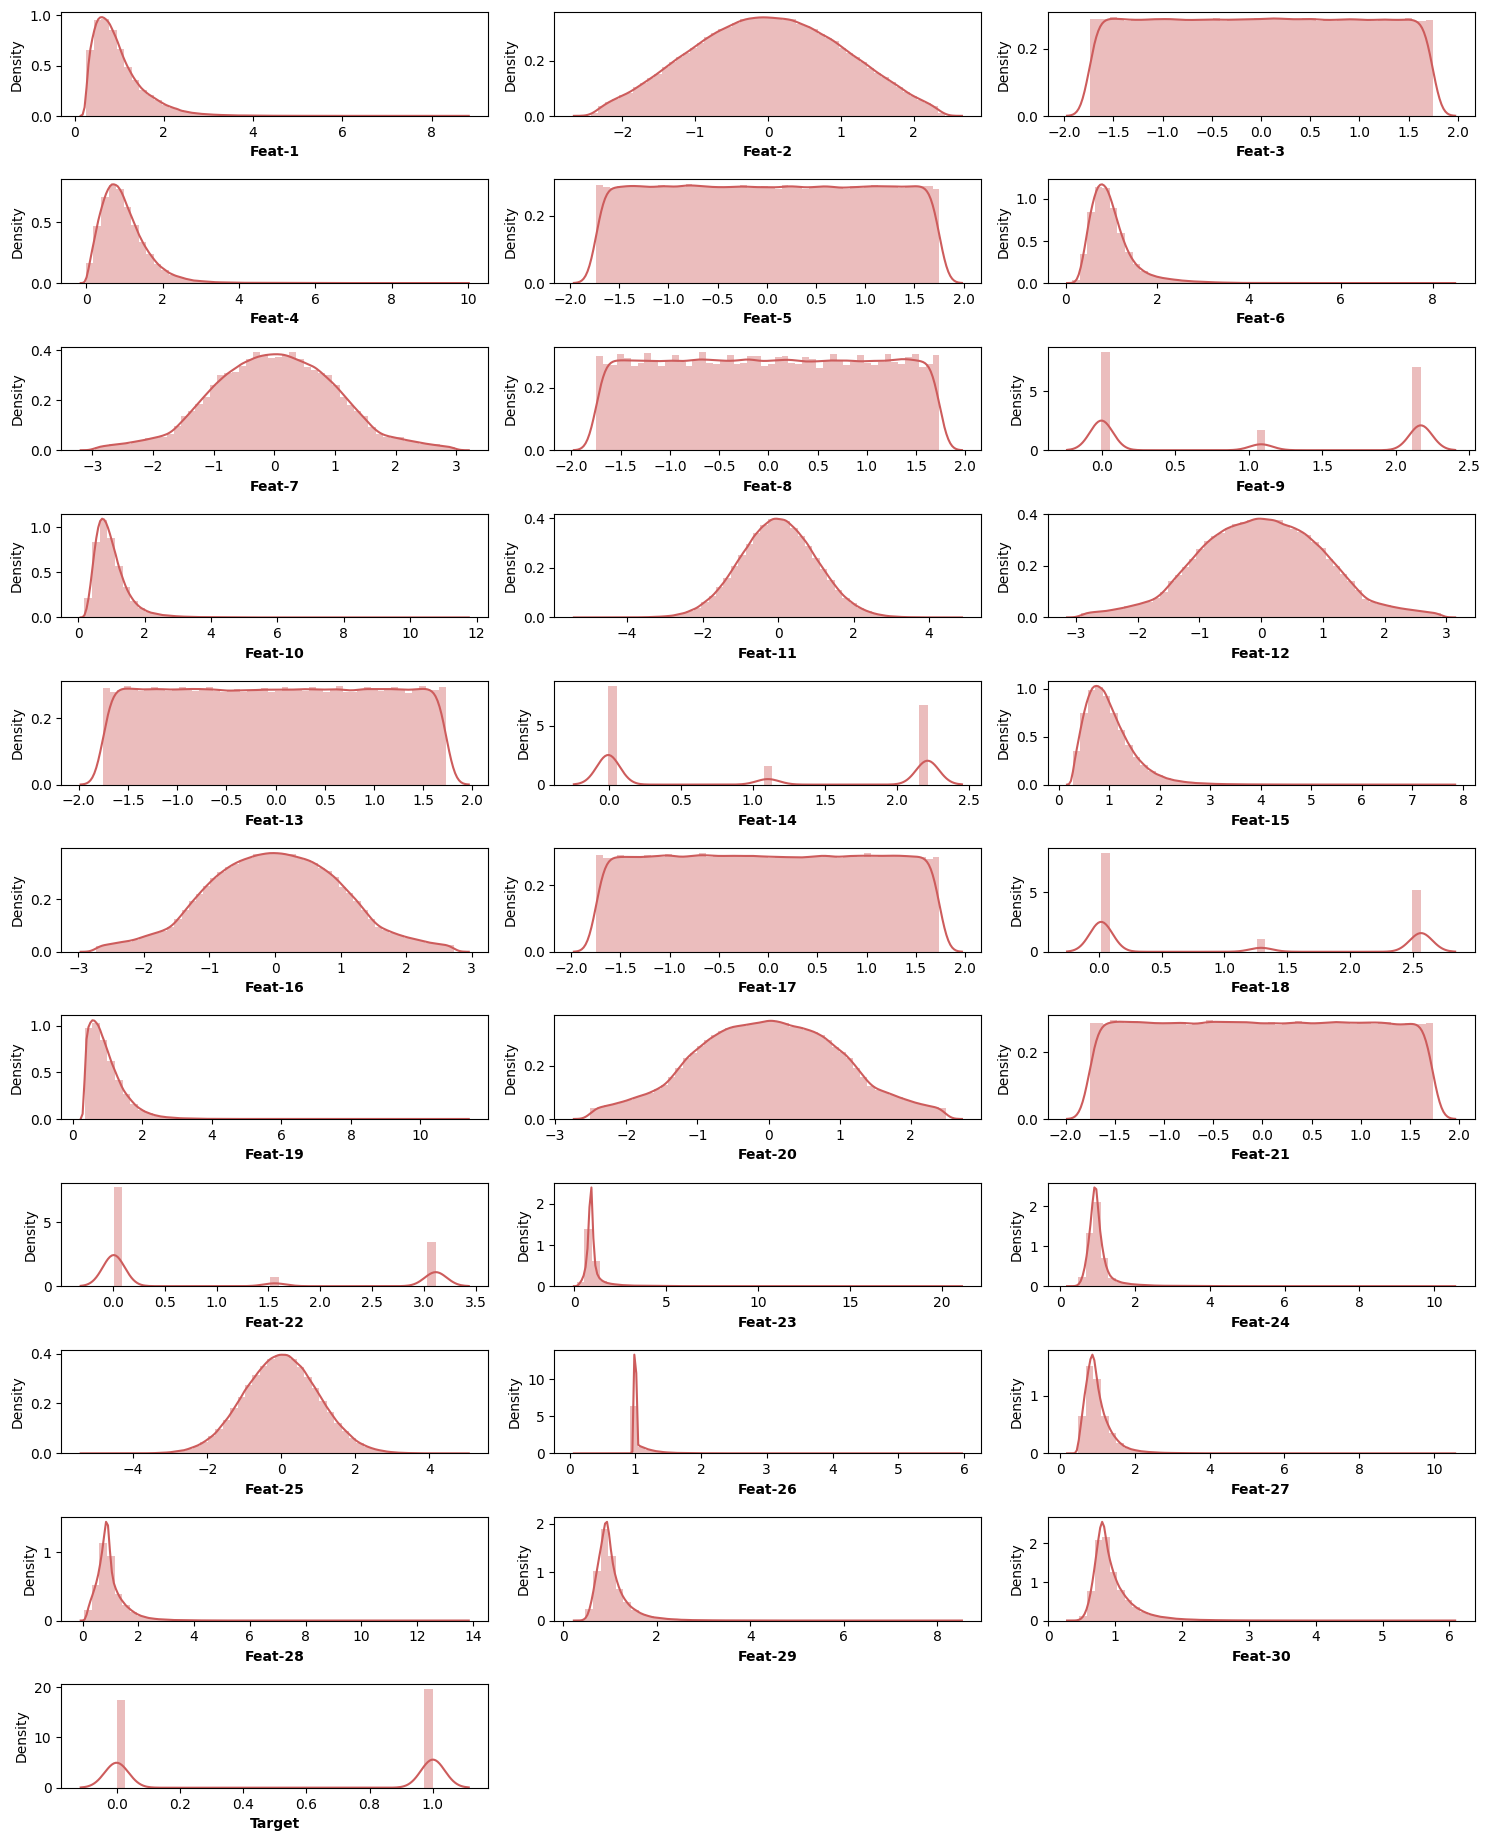

In [110]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=df[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

In [111]:
def check_multicollinearity(df, threshold=0.7):
    df = pd.DataFrame(df)  # Convert dataset to a DataFrame if needed
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df_numeric = df[numeric_cols]
    corr_matrix = df_numeric.corr().abs()  # Calculate the correlation matrix
    cols = corr_matrix.columns
    multicollinear_features = set()

    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            if corr_matrix.iloc[i, j] >= threshold:
                multicollinear_features.add(cols[i])
                multicollinear_features.add(cols[j])

    # Plotting the correlation heatmap
    plt.figure(figsize=(15,12))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

    return multicollinear_features

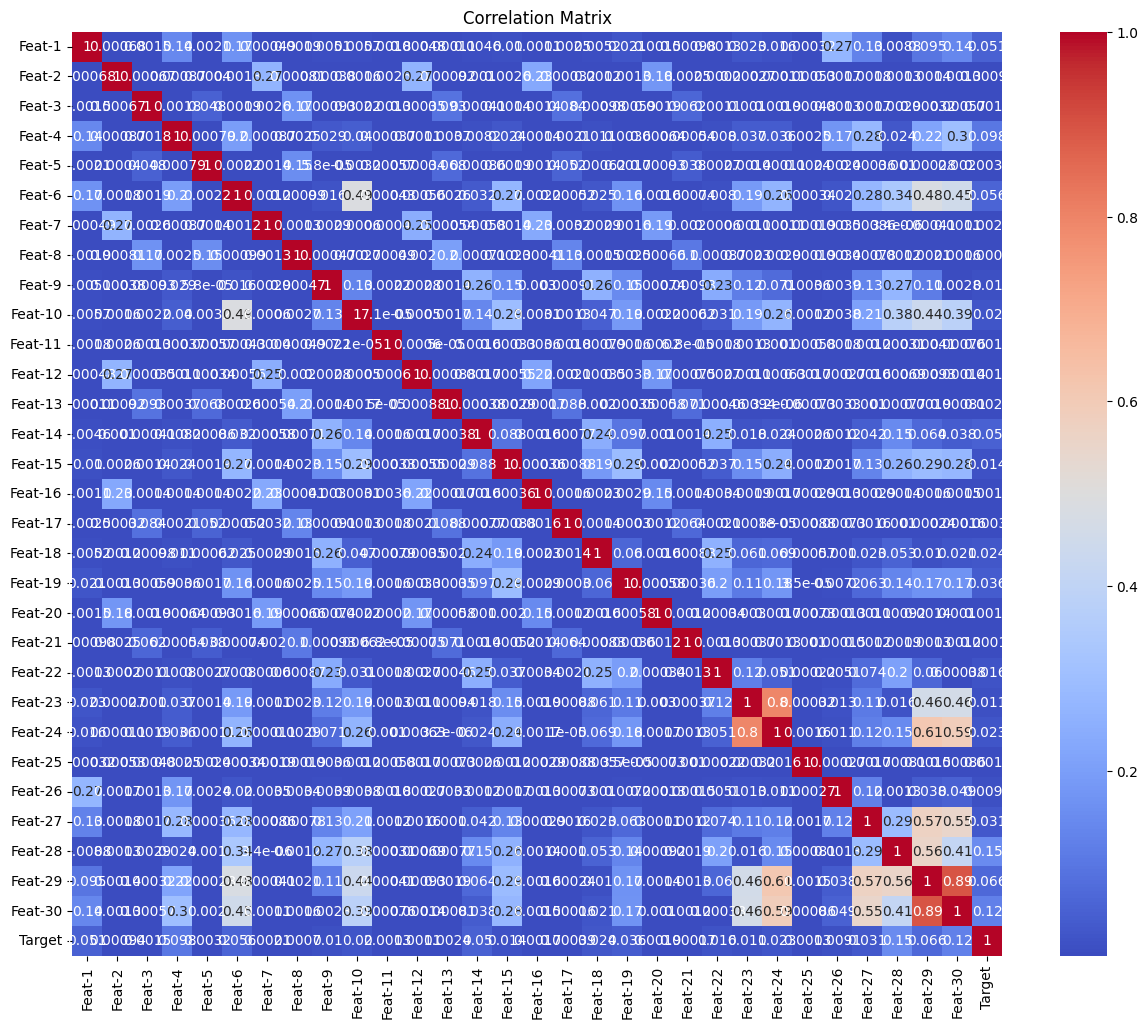

-----------------------------------------------
Multicollinear columns: {'Feat-23', 'Feat-30', 'Feat-24', 'Feat-29'}


In [112]:
multicollinear_cols = check_multicollinearity(df)

print("-----------------------------------------------")

print("Multicollinear columns:", multicollinear_cols)

In [113]:
len(multicollinear_cols)

4

In [114]:
## Dropping the multicollinear columns

df.drop(multicollinear_cols, axis=1, inplace=True)

In [115]:
df.shape

(400000, 27)

In [116]:
X = df.drop(columns=["Target"], axis=1)
y = df["Target"]

In [117]:
y.value_counts()

Target
1.0    211826
0.0    188174
Name: count, dtype: int64

In [118]:
## Define the pipeline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

num_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", RobustScaler())
    ]
)

In [119]:
numerical_features = X.select_dtypes(exclude="object").columns 

numerical_features


Index(['Feat-1', 'Feat-2', 'Feat-3', 'Feat-4', 'Feat-5', 'Feat-6', 'Feat-7',
       'Feat-8', 'Feat-9', 'Feat-10', 'Feat-11', 'Feat-12', 'Feat-13',
       'Feat-14', 'Feat-15', 'Feat-16', 'Feat-17', 'Feat-18', 'Feat-19',
       'Feat-20', 'Feat-21', 'Feat-22', 'Feat-25', 'Feat-26', 'Feat-27',
       'Feat-28'],
      dtype='object')

In [120]:
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[
    ("RobustScaler", RobustScaler(), numerical_features)
], remainder="passthrough")


In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train.columns

Index(['Feat-1', 'Feat-2', 'Feat-3', 'Feat-4', 'Feat-5', 'Feat-6', 'Feat-7',
       'Feat-8', 'Feat-9', 'Feat-10', 'Feat-11', 'Feat-12', 'Feat-13',
       'Feat-14', 'Feat-15', 'Feat-16', 'Feat-17', 'Feat-18', 'Feat-19',
       'Feat-20', 'Feat-21', 'Feat-22', 'Feat-25', 'Feat-26', 'Feat-27',
       'Feat-28'],
      dtype='object')

In [122]:
import pandas as pd
X_train = pd.DataFrame(X_train, columns=['Feat-1', 'Feat-2', 'Feat-3', 'Feat-4', 'Feat-5', 'Feat-6', 'Feat-7',
       'Feat-8', 'Feat-9', 'Feat-10', 'Feat-11', 'Feat-12', 'Feat-13',
       'Feat-14', 'Feat-15', 'Feat-16', 'Feat-17', 'Feat-18', 'Feat-19',
       'Feat-20', 'Feat-21', 'Feat-22', 'Feat-25', 'Feat-26', 'Feat-27',
       'Feat-28'], index=None)
X_train = transformer.fit_transform(X_train)


In [123]:
X_test = pd.DataFrame(X_test, columns=['Feat-1', 'Feat-2', 'Feat-3', 'Feat-4', 'Feat-5', 'Feat-6', 'Feat-7',
       'Feat-8', 'Feat-9', 'Feat-10', 'Feat-11', 'Feat-12', 'Feat-13',
       'Feat-14', 'Feat-15', 'Feat-16', 'Feat-17', 'Feat-18', 'Feat-19',
       'Feat-20', 'Feat-21', 'Feat-22', 'Feat-25', 'Feat-26', 'Feat-27',
       'Feat-28'], index=None)
X_test = transformer.fit_transform(X_test)


In [124]:
X_train.shape, X_test.shape

((300000, 26), (100000, 26))

In [125]:
## Tensorflow imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation

In [126]:
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[-1],), activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [127]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                1728      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4353 (17.00 KB)
Trainable params: 4353 (17.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [128]:
metrics = [
    keras.metrics.BinaryAccuracy(name="accuracy"),
    keras.metrics.AUC(name="auc", curve="ROC"),
    keras.metrics.Precision(name="precision")
]

# Compile the model 
model.compile(optimizer=keras.optimizers.Adam(0.01),
             loss="binary_crossentropy",
             metrics=metrics)

Epoch 1/10
7500/7500 [==============================] - 23s 3ms/step - loss: 0.6060 - accuracy: 0.6688 - auc: 0.7305 - precision: 0.6835 - val_loss: 0.5912 - val_accuracy: 0.6825 - val_auc: 0.7499 - val_precision: 0.6996
Epoch 2/10
7500/7500 [==============================] - 23s 3ms/step - loss: 0.5878 - accuracy: 0.6851 - auc: 0.7522 - precision: 0.7025 - val_loss: 0.5843 - val_accuracy: 0.6885 - val_auc: 0.7580 - val_precision: 0.7054
Epoch 3/10
7500/7500 [==============================] - 22s 3ms/step - loss: 0.5808 - accuracy: 0.6916 - auc: 0.7601 - precision: 0.7135 - val_loss: 0.5769 - val_accuracy: 0.6948 - val_auc: 0.7655 - val_precision: 0.7284
Epoch 4/10
7500/7500 [==============================] - 24s 3ms/step - loss: 0.5755 - accuracy: 0.6970 - auc: 0.7659 - precision: 0.7158 - val_loss: 0.5734 - val_accuracy: 0.6983 - val_auc: 0.7690 - val_precision: 0.7082
Epoch 5/10
7500/7500 [==============================] - 21s 3ms/step - loss: 0.5715 - accuracy: 0.7010 - auc: 0.7701

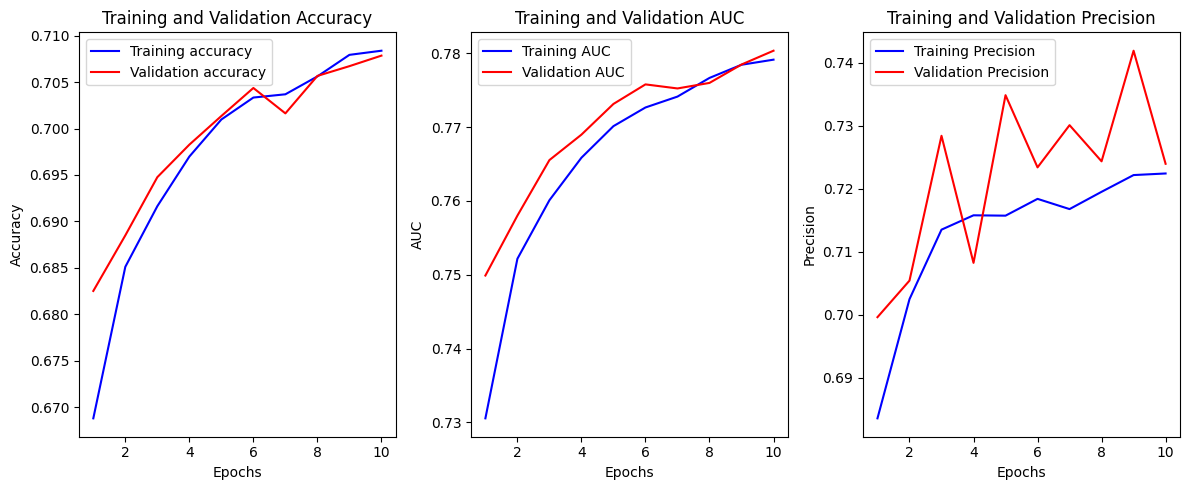

In [129]:
epochs = 10
batch_size = 128

# Train your model (replace X_train, y_train with your data)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Access the training history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
auc = history.history['auc']
val_auc = history.history['val_auc']
precision = history.history['precision']
val_precision = history.history['val_precision']


# Create plots for the metrics
epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(131)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot AUC
plt.subplot(132)
plt.plot(epochs, auc, 'b', label='Training AUC')
plt.plot(epochs, val_auc, 'r', label='Validation AUC')
plt.title('Training and Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()

# Plot precision
plt.subplot(133)
plt.plot(epochs, precision, 'b', label='Training Precision')
plt.plot(epochs, val_precision, 'r', label='Validation Precision')
plt.title('Training and Validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()

plt.tight_layout()
plt.show()

In [130]:
import kerastuner as kt

In [131]:
def model_builder(hp):
  model = keras.Sequential()
  
  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(1, activation='sigmoid'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  metrics = [
    keras.metrics.BinaryAccuracy("accuracy"),
    keras.metrics.AUC(curve="roc"),
    keras.metrics.Precision(name="precision")]

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.BinaryCrossentropy(),
                metrics=metrics)

  return model

In [132]:
tuner = kt.RandomSearch(
    model_builder,
    objective='val_loss',
    max_trials=5)

Reloading Tuner from ./untitled_project/tuner0.json


In [133]:
# using early stopping to stop training the model when optimal value of recall and loss values are achieved.
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_precision', patience=5)

In [134]:
tuner.search(X_train, y_train, epochs=10, validation_data = (X_test, y_test), callbacks=[stop_early], batch_size=128)

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")


The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 416 and the optimal learning rate for the optimizer
is 0.001.



In [146]:
model = Sequential()
model.add(Dense(512, input_shape=(X_train.shape[-1],), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [147]:
model.compile(optimizer=keras.optimizers.Adam(0.01),
             loss='binary_crossentropy',
             metrics=metrics)

In [148]:
epochs = 10 
batch_size = 128 
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/10
2344/2344 [==============================] - 19s 8ms/step - loss: 0.5985 - accuracy: 0.6843 - auc: 0.7511 - precision: 0.7048 - val_loss: 0.5817 - val_accuracy: 0.6823 - val_auc: 0.7599 - val_precision: 0.7432
Epoch 2/10
2344/2344 [==============================] - 18s 8ms/step - loss: 0.5734 - accuracy: 0.6975 - auc: 0.7675 - precision: 0.7200 - val_loss: 0.5808 - val_accuracy: 0.6911 - val_auc: 0.7624 - val_precision: 0.7369
Epoch 3/10
2344/2344 [==============================] - 17s 7ms/step - loss: 0.5637 - accuracy: 0.7064 - auc: 0.7778 - precision: 0.7249 - val_loss: 0.5637 - val_accuracy: 0.7064 - val_auc: 0.7782 - val_precision: 0.7223
Epoch 4/10
2344/2344 [==============================] - 17s 7ms/step - loss: 0.5574 - accuracy: 0.7116 - auc: 0.7842 - precision: 0.7357 - val_loss: 0.5602 - val_accuracy: 0.7106 - val_auc: 0.7844 - val_precision: 0.7158
Epoch 5/10
2344/2344 [==============================] - 18s 8ms/step - loss: 0.5504 - accuracy: 0.7169 - auc: 0.7910

In [149]:
model.save('hb_modelll.h5')

In [150]:
predictions = model.predict(X_test)
threshold = 0.5
binary_predictions = (predictions > threshold).astype(int)

predictions_df = pd.DataFrame()
predictions_df['Predicted'] = binary_predictions[:, 0]

3125/3125 [==============================] - 8s 3ms/step


In [151]:
submission_df = pd.DataFrame()
submission_df['ID'] = range(1, len(predictions_df) + 1)  # Serial numbers starting from 1
submission_df['Answer'] = predictions_df.astype(int)  # Answer' is of integer type

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

# Print the submission DataFrame
#print(submission_df)

In [152]:
df_temp = pd.read_csv('submission.csv')
test_temp = pd.read_csv('/kaggle/input/bits-f464-2023-1-final-project/test.csv')
assert len(df_temp.columns) == 2, "Number of columns in the submission file is not correct, check the submission format"
assert list(df_temp.columns) == ['ID', 'Answer'] , "Column names are not correct, check the submission format"
assert df_temp['Answer'].nunique() == 1 or df_temp['Answer'].nunique() == 2, "The prediction should be 0 or 1 only"
print(len(df_temp))
print(len(test_temp))
assert len(df_temp) == len(test_temp), "Number of rows in the submission file is not correct"

100000
100000


In [153]:
import shutil
import os

if not os.path.exists('temp'):
    os.makedirs('temp')

if os.path.exists('submission.csv'):
    shutil.copy('submission.csv','temp/submission.csv')

if os.path.exists('eval.ipynb'):
    shutil.copy('eval.ipynb',os.path.join('temp','eval.ipynb'))

shutil.make_archive('submission', 'zip', 'temp')
shutil.rmtree('temp')